# youssef shahen 20107033 Data Compression Non-Scalar Quantization project

In [61]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [62]:
image_path = r'C:\Users\hp\Desktop\1\Magdi-Event-a.jpg'

In [65]:
class NonUniformScalarQuantizer:
    def __init__(self, num_bits=4):
        self.num_bits = num_bits

    def quantize(self, image):
        self.original_image = Image.fromarray(image)
        normalized_image = image / 255.0
        quantized_values = np.round(normalized_image * (2 ** self.num_bits - 1)) / (2 ** self.num_bits - 1)
        self.quantized_image = Image.fromarray((quantized_values * 255).astype(np.uint8))
        return self.quantized_image

    def calculate_mse(self):
        original_array = np.array(self.original_image)
        quantized_array = np.array(self.quantized_image)
        mse = np.mean((original_array - quantized_array) ** 2)
        return mse

    def plot_images(self):
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(self.original_image, cmap='gray')
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(self.quantized_image, cmap='gray')
        plt.title('Quantized Image')
        plt.show()


Mean Squared Error: 78.26321808510639


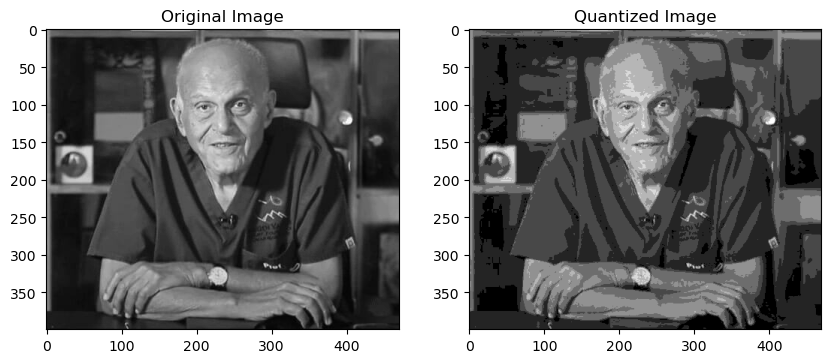

In [73]:
if __name__ == "__main__":
    grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    quantizer = NonUniformScalarQuantizer(num_bits=3)
    quantized_image = quantizer.quantize(grayscale_image)
    
    mse = quantizer.calculate_mse()
    print(f"Mean Squared Error: {mse}")
    
    quantizer.plot_images()
